### LIBRARIES AND PACAKAGES LOADING

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


### EDA

In [94]:
df = pd.read_csv(r"C:\Users\RAMESH\OneDrive\Desktop\NutriClass\data\raw\synthetic_food_dataset_imbalanced.csv")
df.head()


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [95]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [96]:
df.isnull().sum()

df.duplicated().sum()


np.int64(313)

In [97]:
df = df.drop_duplicates()


In [98]:
df.columns


Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [99]:
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()


Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64

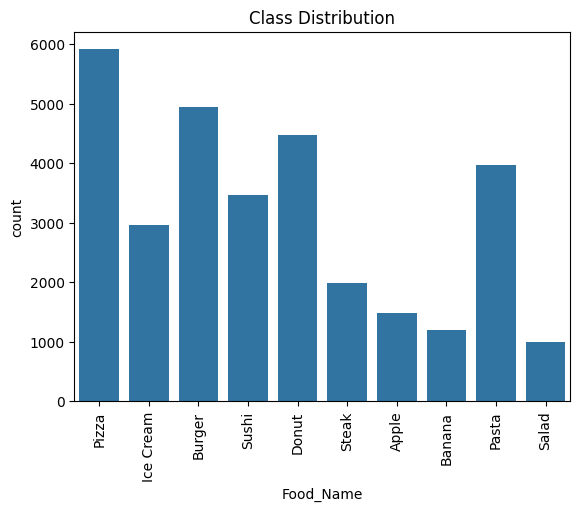

In [100]:
sns.countplot(x=df['Food_Name'])
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.show()



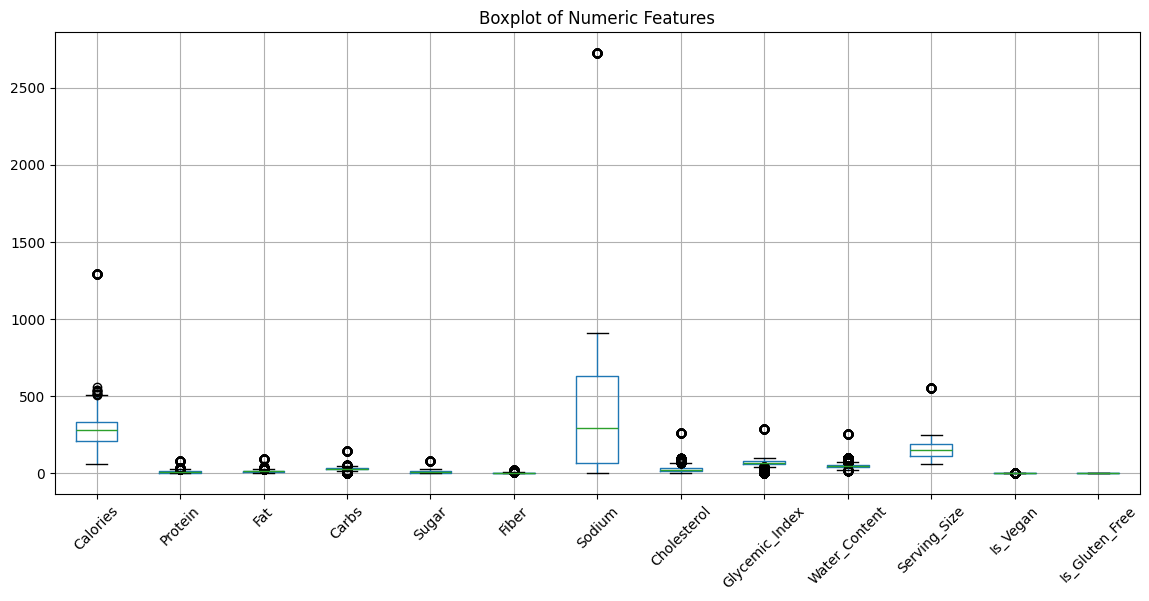

In [101]:
df.boxplot(figsize=(14,6))
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()


In [102]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')

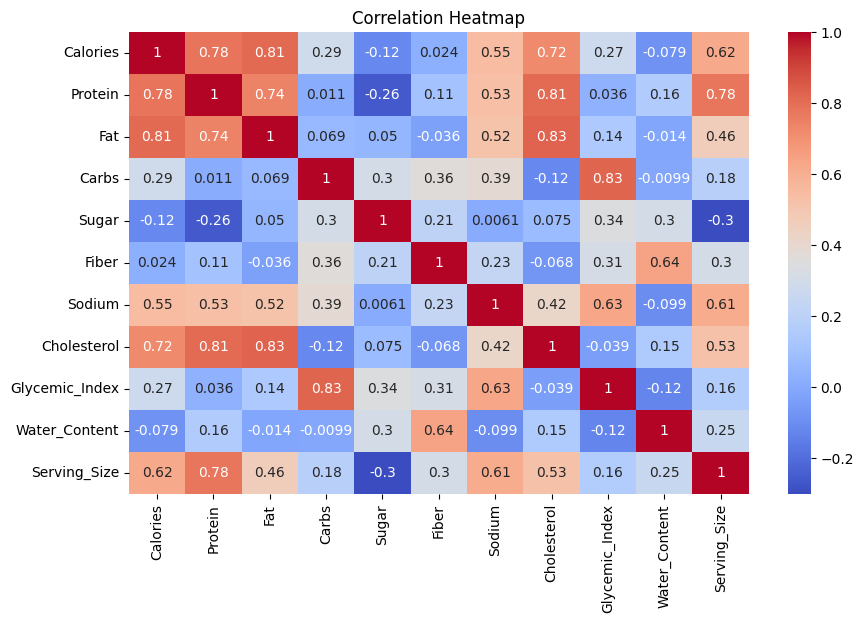

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### DATA PREPROCESSING

In [104]:
X = df.drop("Food_Name", axis=1)
y = df["Food_Name"]


In [105]:
df_encoded = pd.get_dummies(df, columns=['Meal_Type', 'Preparation_Method'], drop_first=True)
df_encoded.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Food_Name,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,False,False,Pizza,True,False,False,True,False,False
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,False,True,Ice Cream,False,False,True,False,False,True
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,False,False,Burger,False,False,True,False,False,True
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,False,True,Sushi,False,True,False,True,False,False
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,False,False,Donut,False,False,True,False,False,False


In [106]:
X = df_encoded.drop("Food_Name", axis=1)
y = df_encoded["Food_Name"]


In [107]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [108]:
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)


#### TRAIN-TEST SPLIT

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### MODEL TRAINING

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    print("="*60)
    print(name)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    
    print("Accuracy:", acc)
    print("\nClassification Report:")
    print(classification_report(y_test, pred))
    
    results[name] = acc


Logistic Regression


Accuracy: 0.9917171073590315

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.97      0.97      0.97       239
           2       0.98      0.99      0.99       988
           3       1.00      1.00      1.00       893
           4       1.00      1.00      1.00       594
           5       0.99      0.99      0.99       795
           6       0.99      0.99      0.99      1183
           7       0.99      1.00      0.99       199
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Decision Tree
Accuracy: 0.9859827970691303

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1

### CONFUSION METRICS

<Figure size 600x400 with 0 Axes>

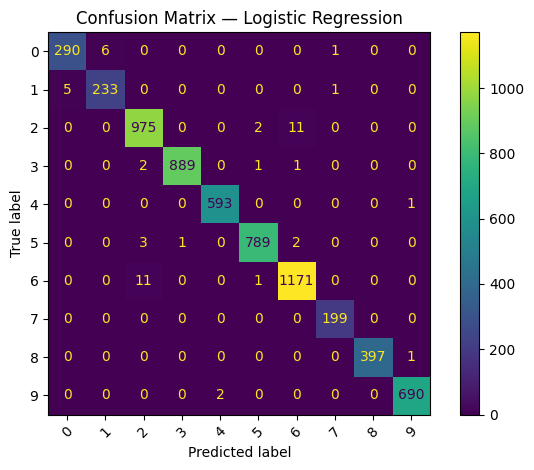

<Figure size 600x400 with 0 Axes>

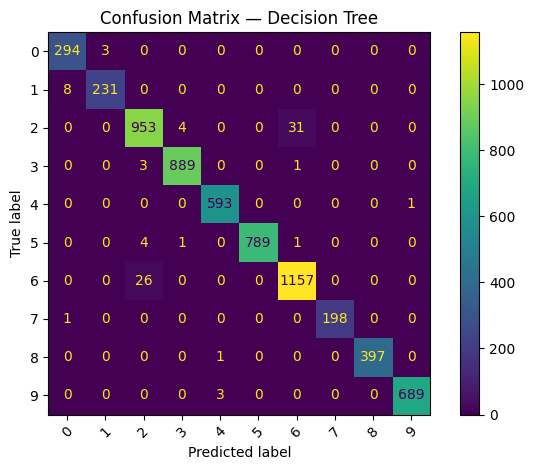

<Figure size 600x400 with 0 Axes>

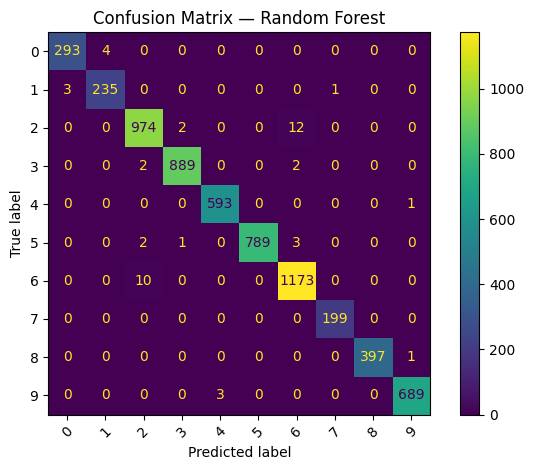

<Figure size 600x400 with 0 Axes>

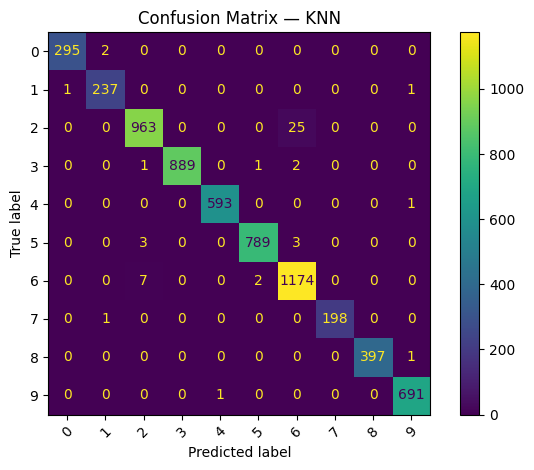

<Figure size 600x400 with 0 Axes>

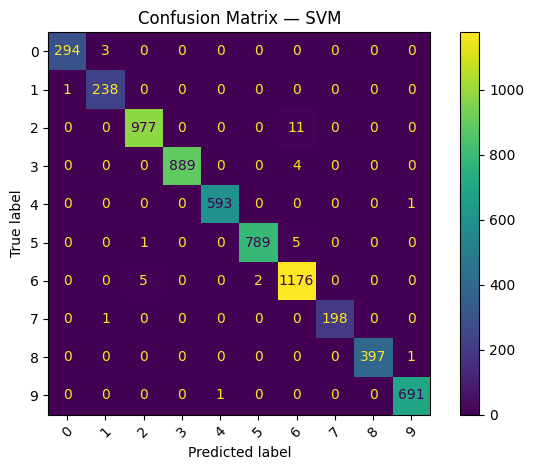

<Figure size 600x400 with 0 Axes>

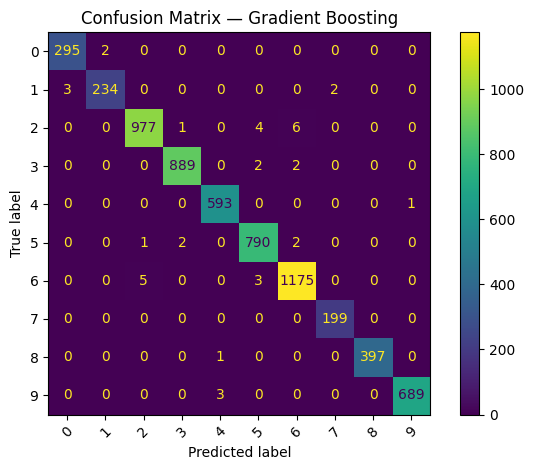

<Figure size 600x400 with 0 Axes>

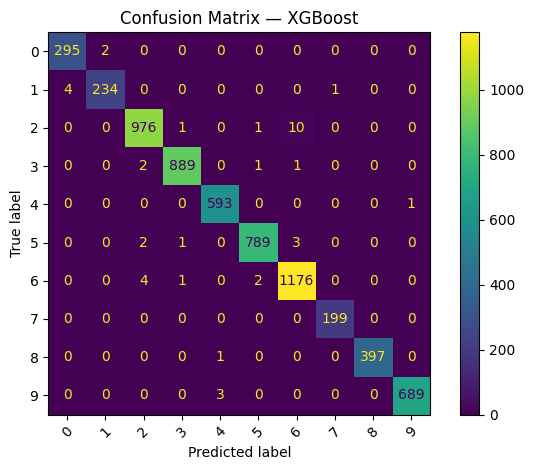

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    plt.figure(figsize=(6,4))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"Confusion Matrix — {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### FEATURE IMPORTANCE

Best Model: SVM
This model does not support feature_importances_.
Feature Importance for: Logistic Regression
⚠️ Feature importance not supported for model: Logistic Regression
Feature Importance for: Decision Tree


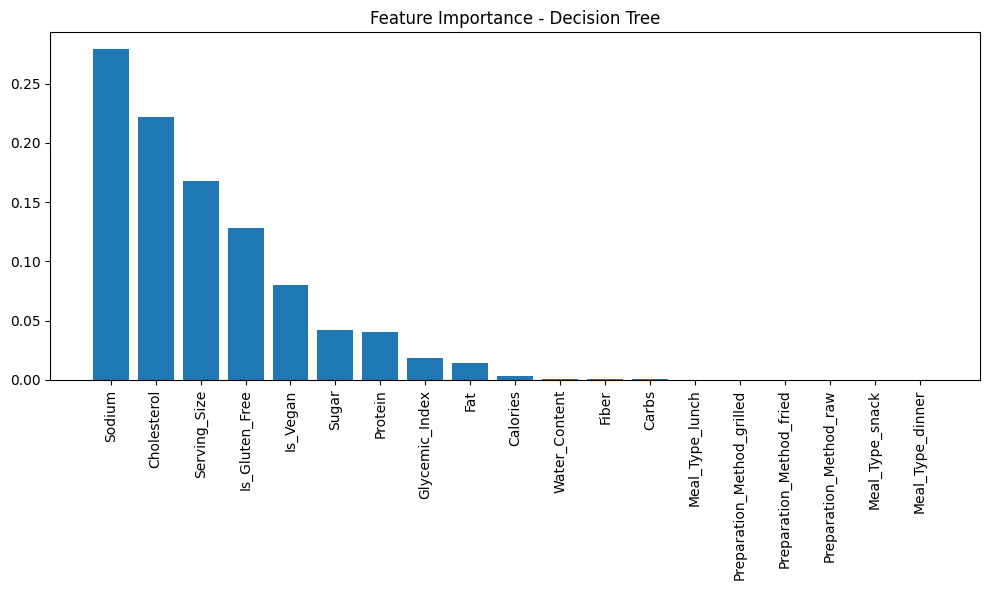

Feature Importance for: Random Forest


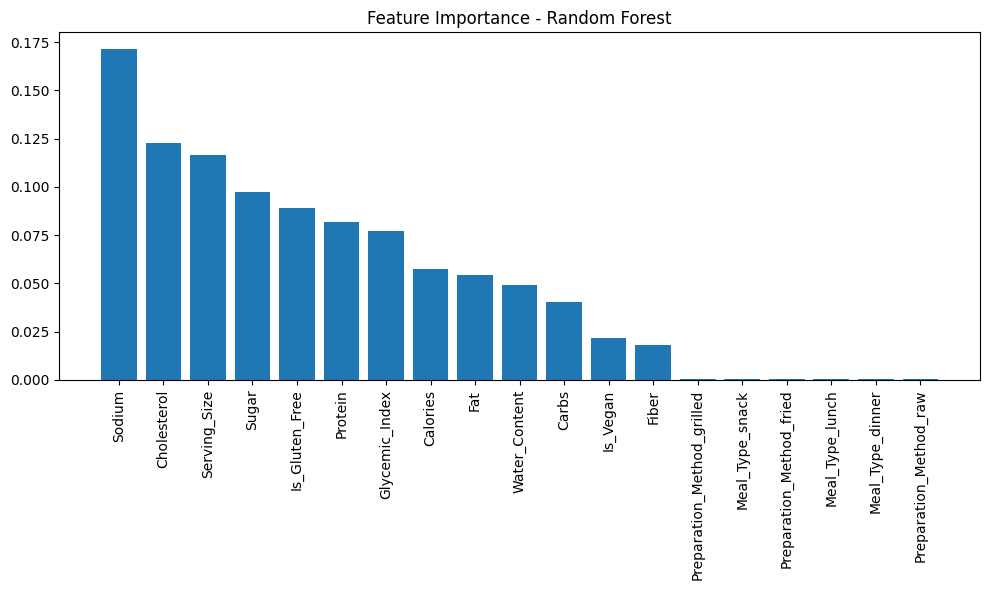

Feature Importance for: KNN
⚠️ Feature importance not supported for model: KNN
Feature Importance for: SVM
⚠️ Feature importance not supported for model: SVM
Feature Importance for: Gradient Boosting


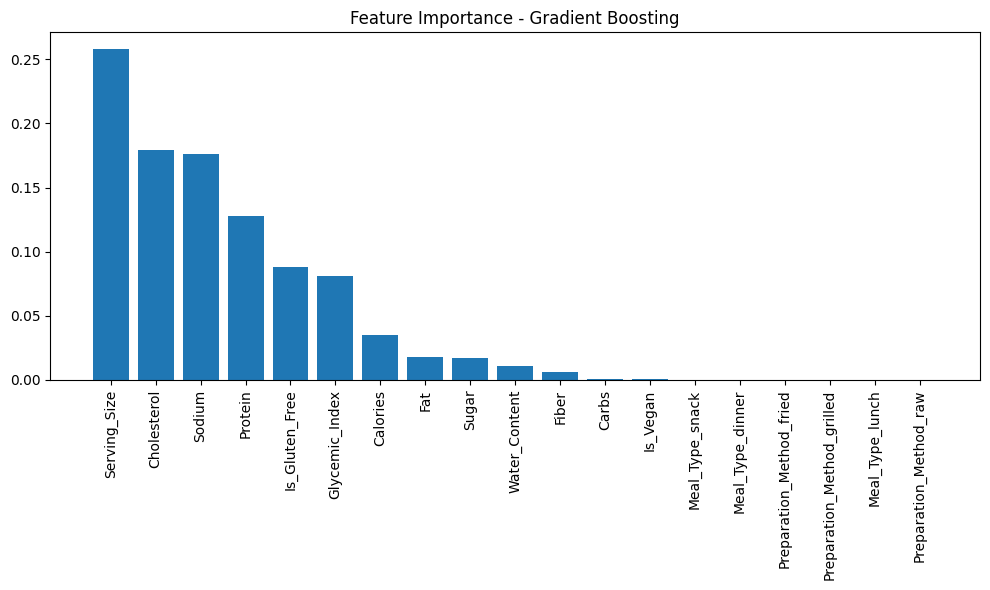

Feature Importance for: XGBoost


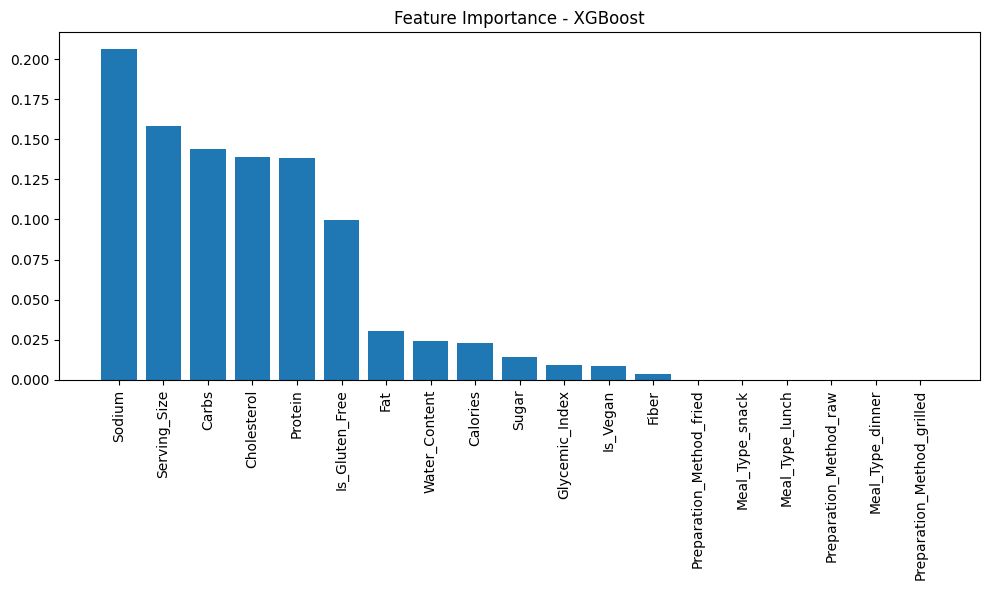

In [119]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("Best Model:", best_model_name)

if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    plt.figure(figsize=(10,6))
    plt.bar(X.columns, importances)
    plt.xticks(rotation=90)
    plt.title("Feature Importance")
    plt.show()
else:
    print("This model does not support feature_importances_.")

## FEATURE IMPORTANCE OF TREE MODELS

# Loop through all models and extract feature importances ONLY for tree-based models

for name, model in models.items():
    print("="*60)
    print(f"Feature Importance for: {name}")
    
    # Check if model supports feature_importances_
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X.columns
        
        # Sort importances
        indices = np.argsort(importances)[::-1]
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance - {name}")
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Feature importance not supported for model: {name}")
